# DCS 630 Predictive Analytics (DSC630-T302 2231-1)
## Bellevue University
## Term Project: Prediction of Water Quality
## Author: Jake Meyer
## Date: 

### Dataset Source

The objective of this project is to construct a model to predict whether water is potable based on water quality measurements. The dataset used for this analysis can be found through the link below: <br>
[Prediction of Water Quality Dataset](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

### Import Necessary Libraries

In [1]:
'''
Import the necessary libraries for the analysis.
'''
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.cluster import KMeans
from scipy.stats import pointbiserialr
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)
print('sklearn:', sklearn.__version__)

numpy version: 1.20.3
pandas version: 1.3.4
seaborn version: 0.11.2
matplotlib version: 3.4.3
sklearn: 0.24.2


### Overview of Dataset

In [3]:
'''
Import the dataset.
Note: A copy of the CSV file was placed into the same directory as this notebook.
Utilize pd.read_csv() to read the file as a pandas data frame.
'''
df = pd.read_csv('water_potability.csv')

In [4]:
'''
Use head() function to display the first 10 rows of data of df.
'''
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [5]:
'''
Understand the shape of the dataset.
'''
print('There are {} rows and {} columns in this dataset.'.format(df.shape[0], df.shape[1]))

There are 3276 rows and 10 columns in this dataset.


In [6]:
'''
Display the total size of this dataset.
'''
print('This dataset contains {} records.'.format(df.size))

This dataset contains 32760 records.


In [7]:
'''
Find the type of data within each column initially.
'''
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [8]:
'''
Understand if there are any missing values in the dataset.
'''
df.isna().sum().sort_values(ascending = False)

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

In [9]:
'''
Understand how many missing values are in the dataset initially.
'''
missing_values = df.isna().sum().sum()
print('This dataset contains {} total missing values.'.format(missing_values))

This dataset contains 1434 total missing values.


The missing values are located within Sulfate, ph, and Trihalomethane features. There are 781, 491, and 162 missing values in each respective feature. This will need to be addressed during the Data Preparation step. 

In [10]:
'''
Convert the target variable "Potablity" to categorical data type.
'''
df['Potability'] = df.Potability.astype('category')

In [11]:
'''
Summarize the findings above with info().
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               2785 non-null   float64 
 1   Hardness         3276 non-null   float64 
 2   Solids           3276 non-null   float64 
 3   Chloramines      3276 non-null   float64 
 4   Sulfate          2495 non-null   float64 
 5   Conductivity     3276 non-null   float64 
 6   Organic_carbon   3276 non-null   float64 
 7   Trihalomethanes  3114 non-null   float64 
 8   Turbidity        3276 non-null   float64 
 9   Potability       3276 non-null   category
dtypes: category(1), float64(9)
memory usage: 233.8 KB


### Highlights for Dataset Overview: 
<ul>
    <li> There are 3276 records and 10 features in the dataset.
    <li> There are 1434 missing values within Sulfate, ph, and Trihalomethanes features.
    <li> The target variable "Potability" was converted from an integer data type to categorical.
<ul>

### Data Understanding - Preliminary Preparation

In [12]:
'''
Revise the column headers for the dataset. 
Intended to make specific feature calls easier by converting to lowercase.
'''
column_names = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
               'organic_carbon', 'trihalomethanes', 'turbidity', 'potability']
df.columns = column_names

In [13]:
'''
Understand the descriptive statistics with describe() for the numeric features.
'''
df.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [14]:
'''
Review the percentage of missing features for sulfate, ph, and trihalomethanes.
'''
perc_missing = round(df.isnull().sum() * 100 / len(df),2)
df_missing = pd.DataFrame({'feature': df.columns, 'percent_missing': perc_missing})
df_missing.sort_values(by= 'percent_missing', ascending = False)

,feature,percent_missing
sulfate,sulfate,23.84
ph,ph,14.99
trihalomethanes,trihalomethanes,4.95
hardness,hardness,0.00
solids,solids,0.00
chloramines,chloramines,0.00
conductivity,conductivity,0.00
organic_carbon,organic_carbon,0.00
turbidity,turbidity,0.00
potability,potability,0.00


In [15]:
'''
Based on the descriptive statistics above, the mean or median may be a suitable choice to replace the features 
for each respective variabels. I've decided to use median with SimpleImputer() to handle the missing values 
for these three columns.
'''
df[:] = SimpleImputer(strategy = 'median').fit_transform(df)

In [16]:
'''
Show that all missing values have been replaced using same methodology as above.
'''
perc_missing_rev = round(df.isnull().sum() * 100 / len(df),2)
df_missing_rev = pd.DataFrame({'feature': df.columns, 'percent_missing': perc_missing_rev})
df_missing_rev.sort_values(by= 'percent_missing', ascending = False)

,feature,percent_missing
ph,ph,0.0
hardness,hardness,0.0
solids,solids,0.0
chloramines,chloramines,0.0
sulfate,sulfate,0.0
conductivity,conductivity,0.0
organic_carbon,organic_carbon,0.0
trihalomethanes,trihalomethanes,0.0
turbidity,turbidity,0.0
potability,potability,0.0


In [17]:
'''
Show the revised dataframe after preliminary prepearation steps. 
'''
df.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


### Highlights for Preliminary Data Preparation: 
<ul>
    <li> Columns were renamed for convenience of analysis.
    <li> Descriptive statistics of each numeric variable were displayed.
    <li> Missing values for sulfate, ph, and trihalomethanes were replaced with the median values for each respective feature.
<ul>

### Data Understanding - Univariate Analysis

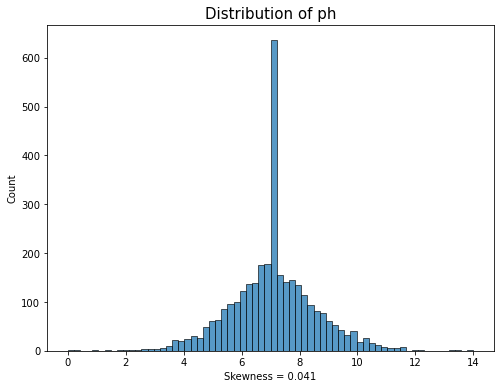

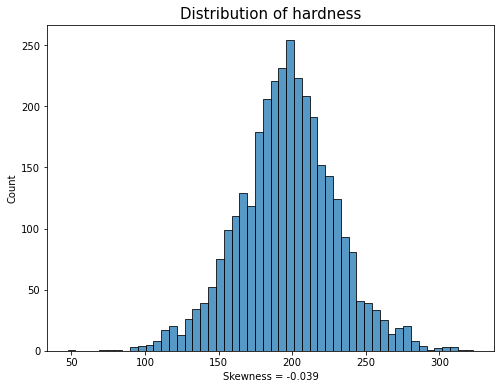

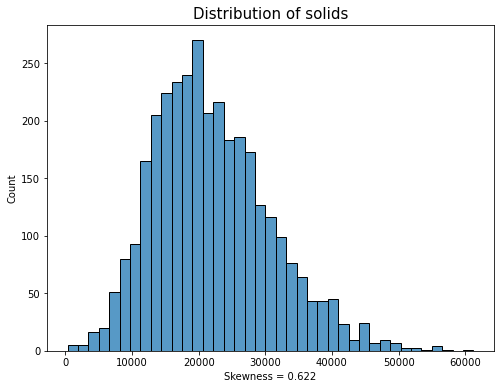

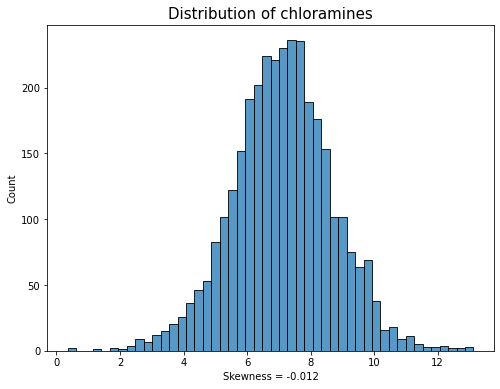

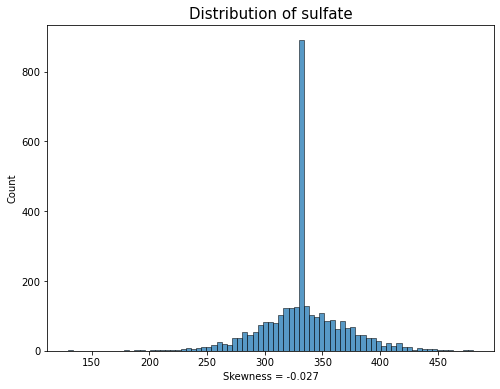

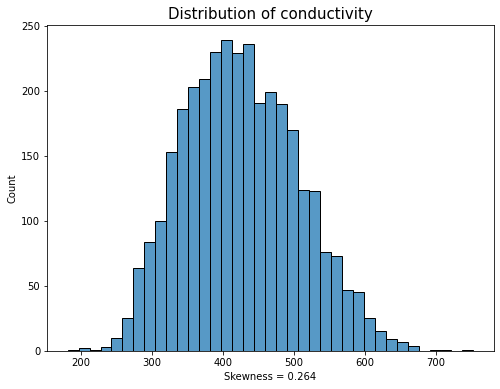

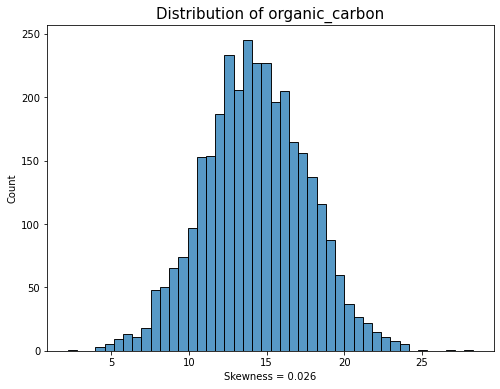

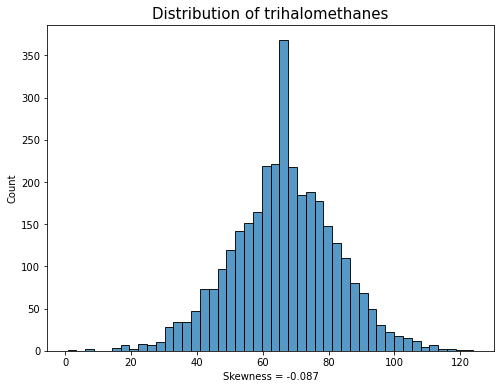

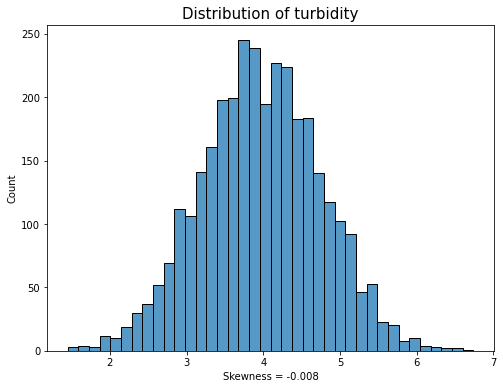

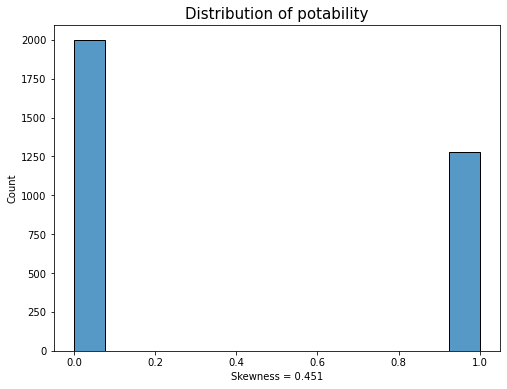

In [18]:
'''
Understand the Distribution for the features within the dataset.
The code below will loop through each feature and illustrate how the feature is distributed.
The skewness value will also be included below the chart.
'''
for col in df.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(x =df[col]) 
    plt.title("Distribution of {}".format(col), fontsize=15) 
    plt.xlabel(f"Skewness = {round(df[col].skew(),3)}", fontsize=10) 
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    plt.show()

In [19]:
'''
Use describe() to understand the target variable descriptive statistics.
'''
df['potability'].value_counts()

0.0    1998
1.0    1278
Name: potability, dtype: int64

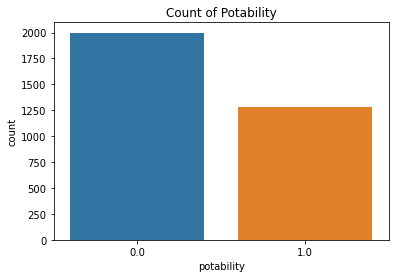

In [20]:
'''
Understand the balance of the 'potability' variable with a countplot.
The count will illustrate potable (1) and non-potable (0) records from the dataset.
'''
sns.countplot(x='potability', data = df).set(title = 'Count of Potability')
plt.show()

### Highlights for Univariate Analysis: 
<ul>
    <li> 
    <li> 
    <li> 
<ul>

### Data Understanding - Multivariate Analysis

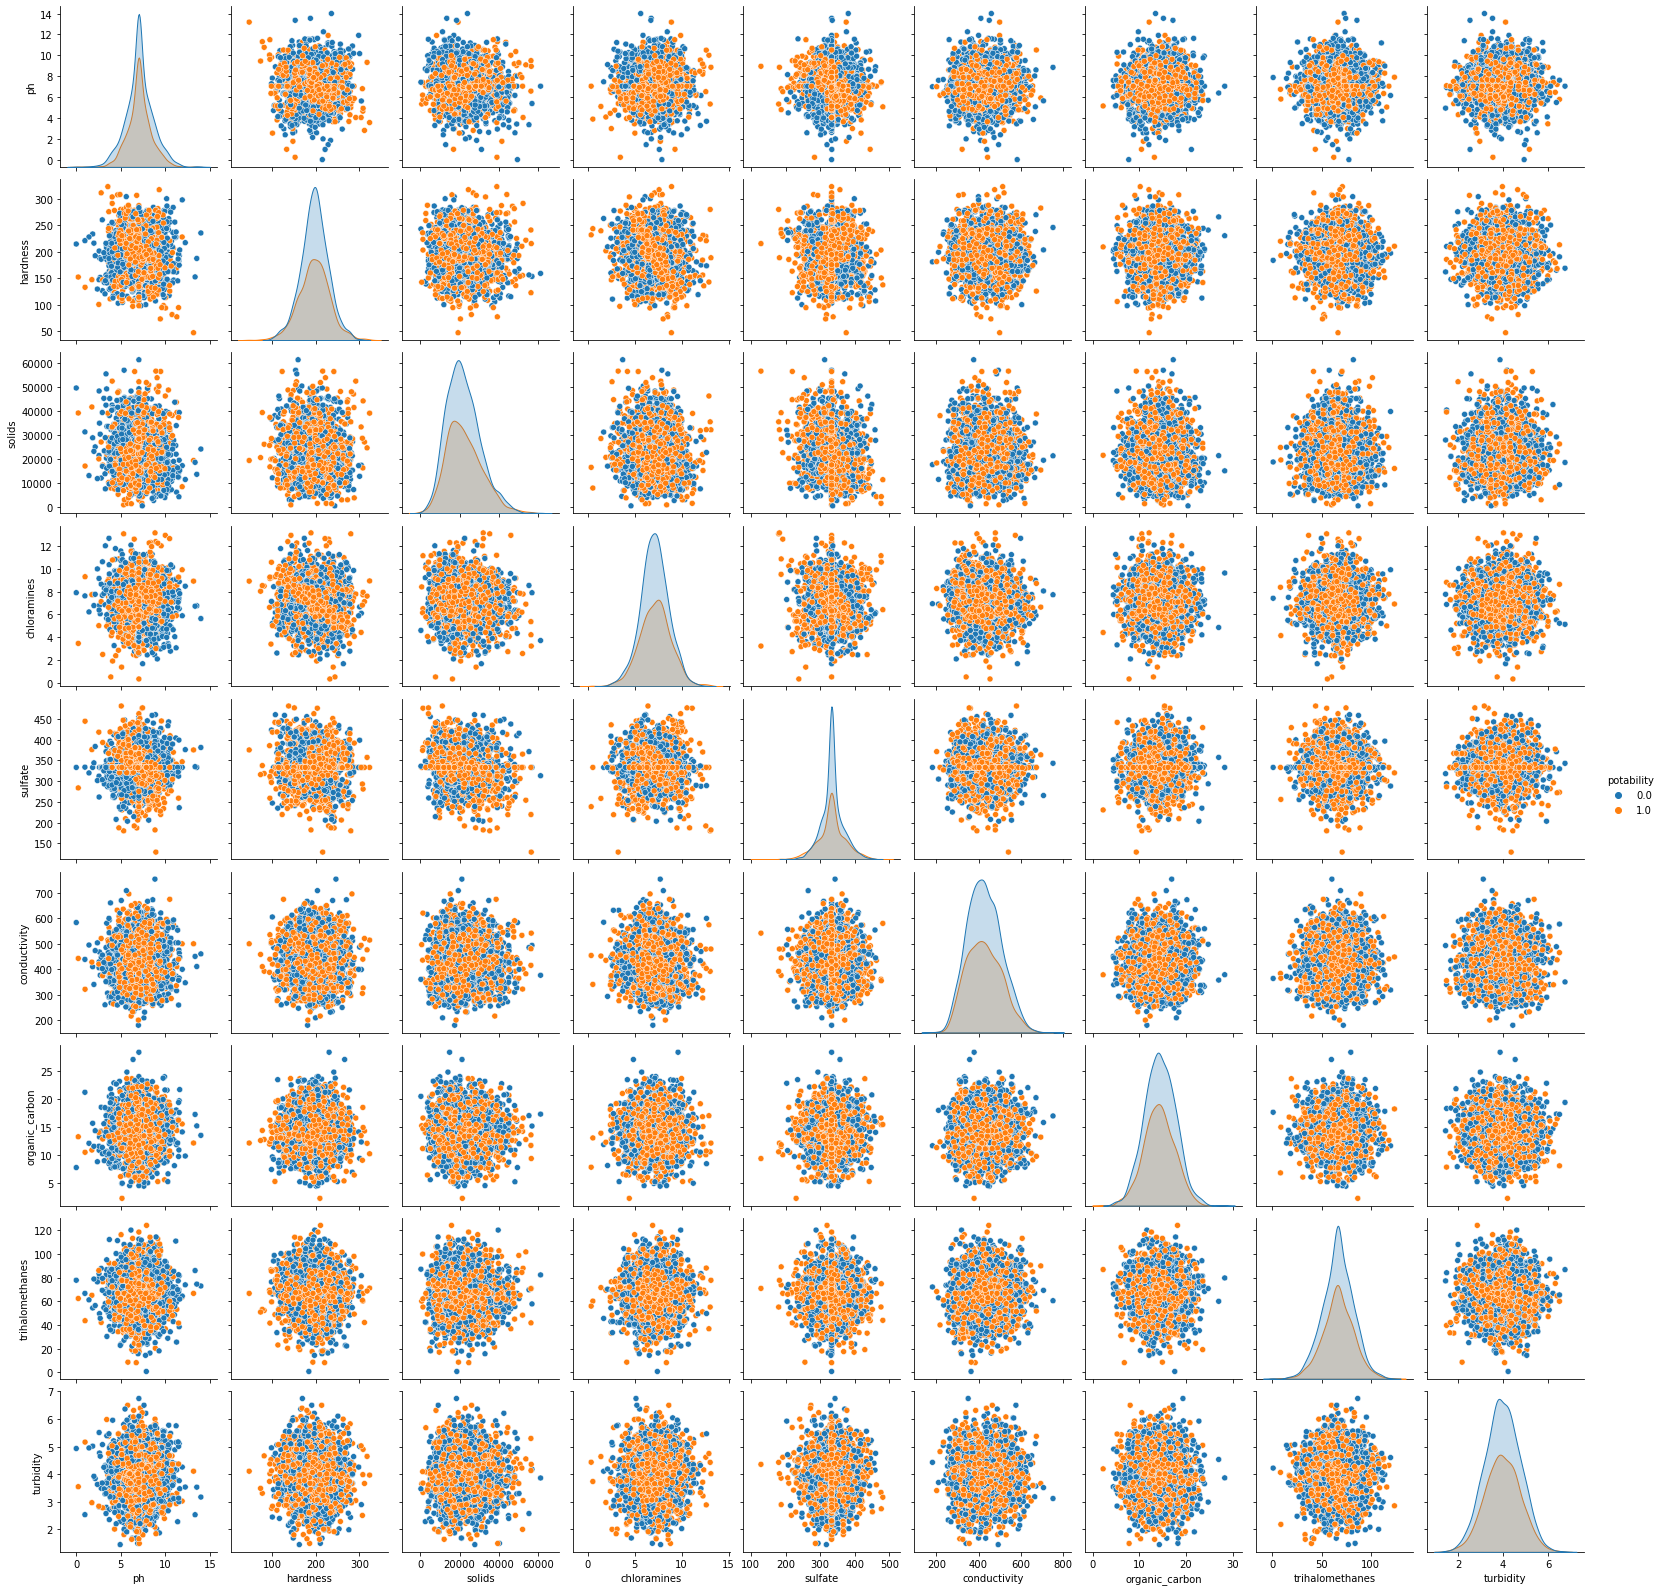

In [21]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by potability.
'''
sns.pairplot(df, hue = 'potability')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Water Potability Dataset')

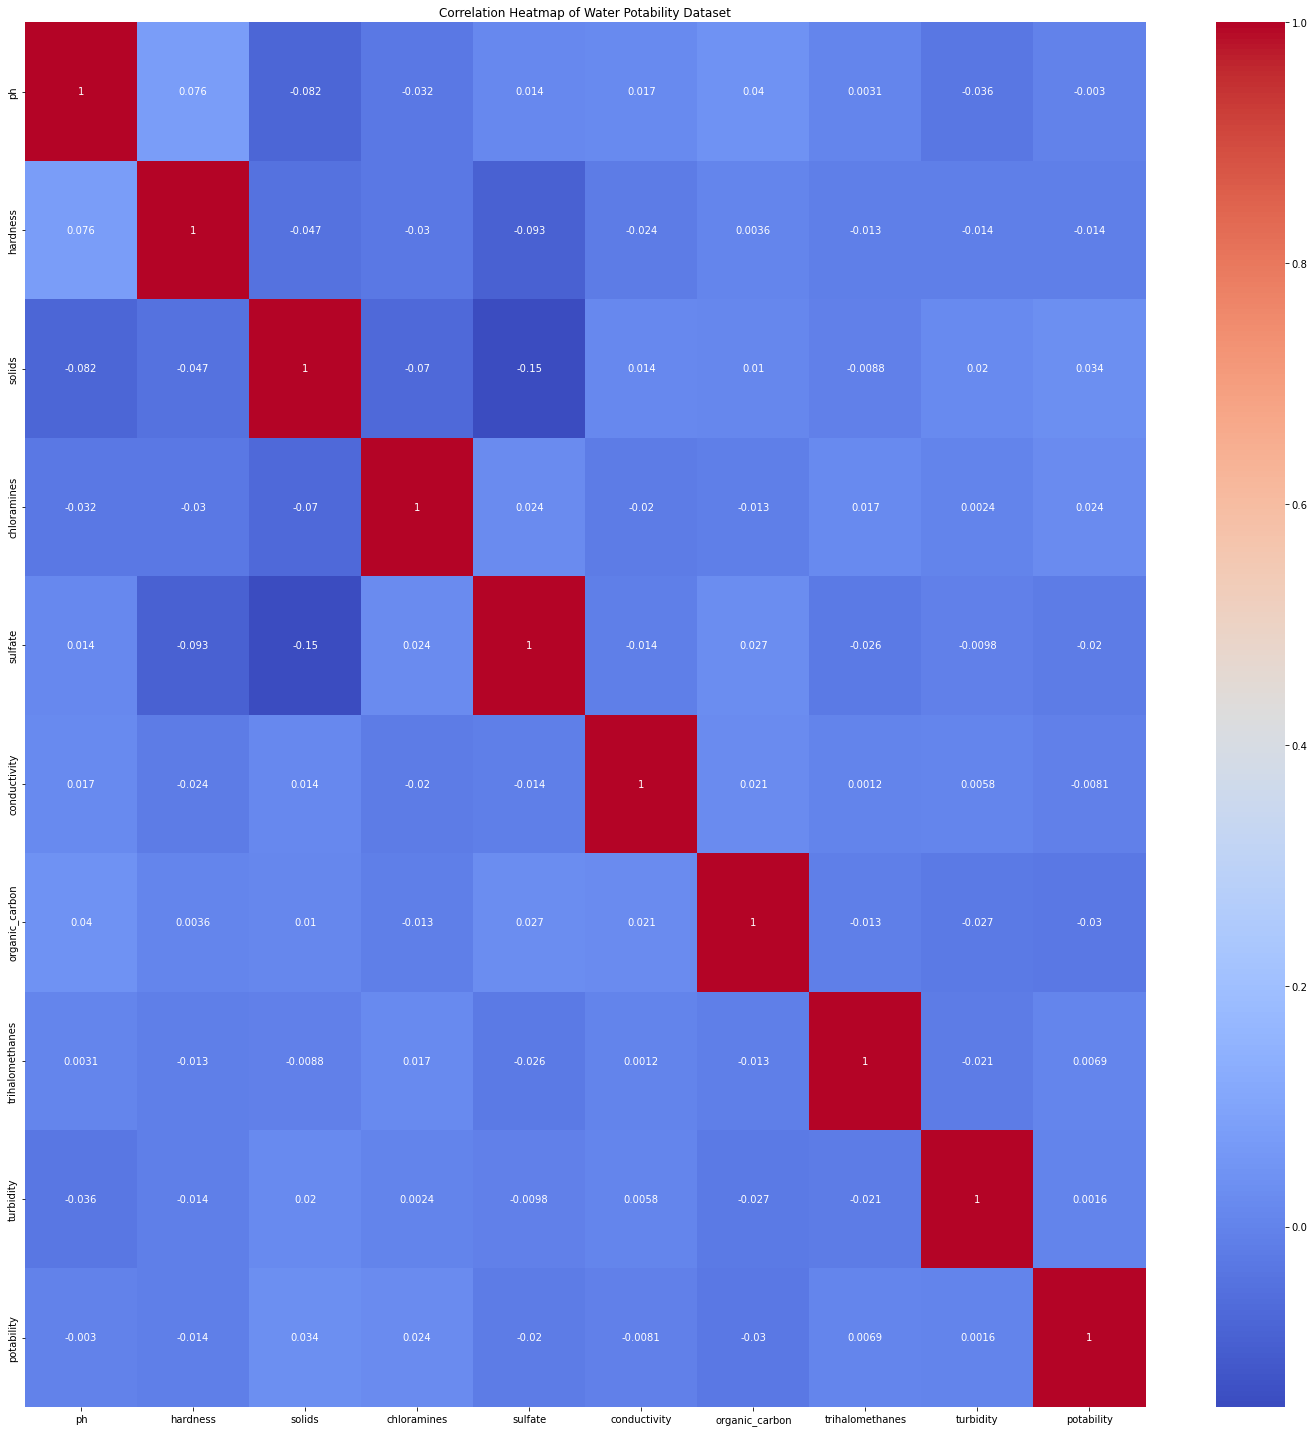

In [22]:
'''
Display a correlation heatmap. Utilize sns.heatmap() to generate the figure.
'''
# Calculate the correlation coefficient with corr().
correlation_number = df.corr()

# Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(20,20), tight_layout = True)
sns.heatmap(correlation_number, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of Water Potability Dataset')

In [23]:
'''
Check pointbiserial correlations for potability to see if there are any significant differences from heatmap.
'''
# Calculate the correlation coefficient for features with potability.
correlation_number_pb1 = pointbiserialr(df['potability'],df['ph'])
correlation_number_pb2 = pointbiserialr(df['potability'],df['hardness'])
correlation_number_pb3 = pointbiserialr(df['potability'],df['solids'])
correlation_number_pb4 = pointbiserialr(df['potability'],df['chloramines'])
correlation_number_pb5 = pointbiserialr(df['potability'],df['sulfate'])
correlation_number_pb6 = pointbiserialr(df['potability'],df['conductivity'])
correlation_number_pb7 = pointbiserialr(df['potability'],df['organic_carbon'])
correlation_number_pb8 = pointbiserialr(df['potability'],df['trihalomethanes'])
correlation_number_pb9 = pointbiserialr(df['potability'],df['turbidity'])

# Create a list of the pointbiserial correlation values.
pb_corr = [correlation_number_pb1, correlation_number_pb2, correlation_number_pb2,
          correlation_number_pb3, correlation_number_pb4, correlation_number_pb5,
          correlation_number_pb6, correlation_number_pb7, correlation_number_pb8,
          correlation_number_pb9]
pb_corr

[PointbiserialrResult(correlation=-0.0030139288906728037, pvalue=0.8630909569723499),
 PointbiserialrResult(correlation=-0.013836558096163432, pvalue=0.42854158703761713),
 PointbiserialrResult(correlation=-0.013836558096163432, pvalue=0.42854158703761713),
 PointbiserialrResult(correlation=0.033743313390906485, pvalue=0.05346363820366133),
 PointbiserialrResult(correlation=0.0237789720027849, pvalue=0.1736102245030519),
 PointbiserialrResult(correlation=-0.020476394607078924, pvalue=0.2413296939297576),
 PointbiserialrResult(correlation=-0.00812831972472755, pvalue=0.6418845484637925),
 PointbiserialrResult(correlation=-0.030001366622918028, pvalue=0.08599746151306269),
 PointbiserialrResult(correlation=0.006886582826791652, pvalue=0.6935683946431569),
 PointbiserialrResult(correlation=0.0015806819408441912, pvalue=0.9279391626737951)]

In [24]:
'''
Understand which features are highly correlated with potability.
'''
df.corr().unstack()['potability'].sort_values(ascending = False).drop_duplicates()

potability         1.000000
solids             0.033743
chloramines        0.023779
trihalomethanes    0.006887
turbidity          0.001581
ph                -0.003014
conductivity      -0.008128
hardness          -0.013837
sulfate           -0.020476
organic_carbon    -0.030001
dtype: float64

<Figure size 576x288 with 0 Axes>

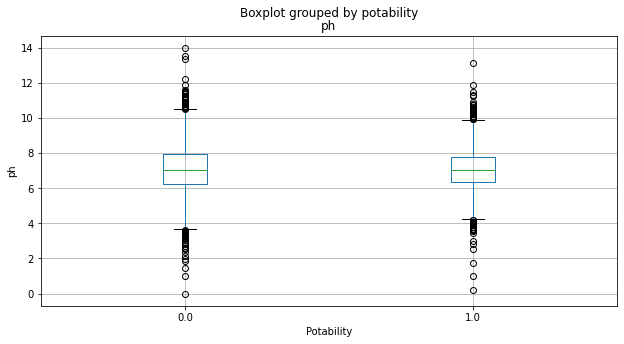

<Figure size 576x288 with 0 Axes>

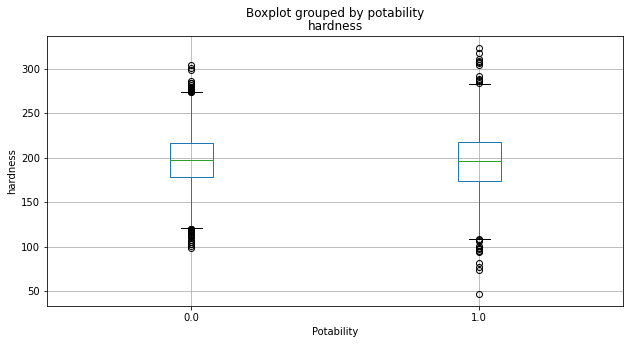

<Figure size 576x288 with 0 Axes>

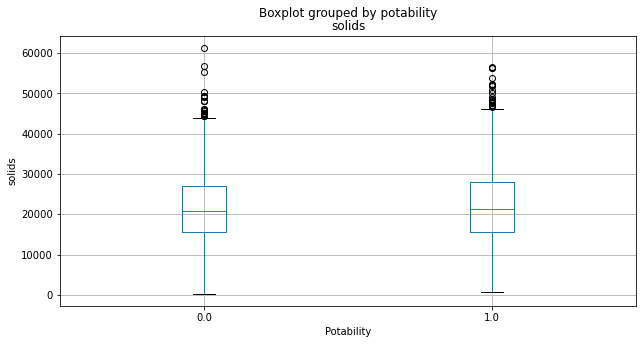

<Figure size 576x288 with 0 Axes>

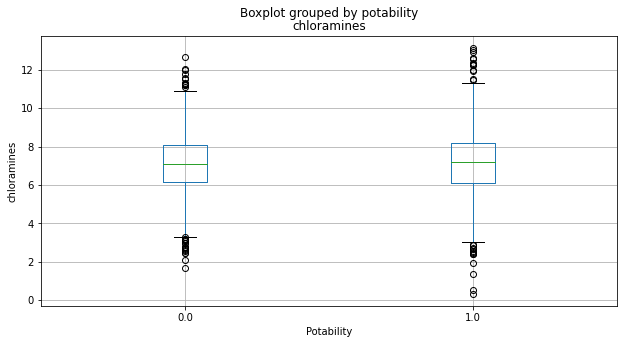

<Figure size 576x288 with 0 Axes>

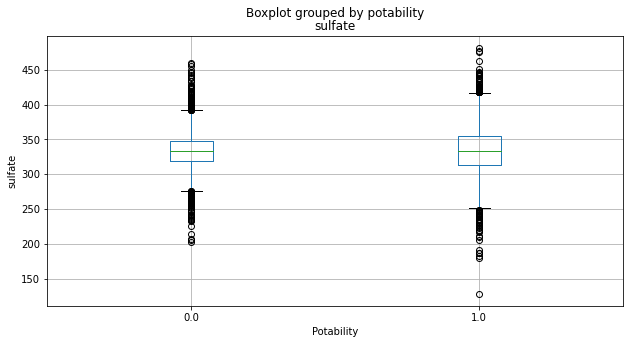

<Figure size 576x288 with 0 Axes>

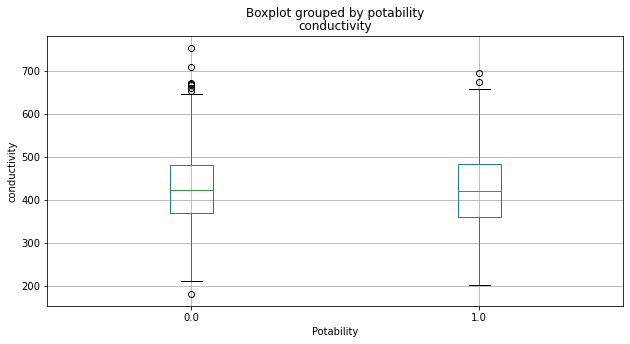

<Figure size 576x288 with 0 Axes>

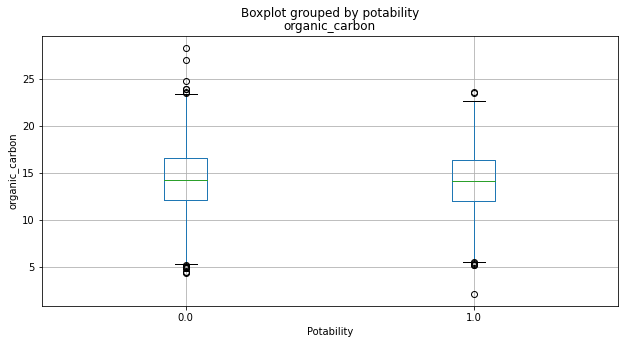

<Figure size 576x288 with 0 Axes>

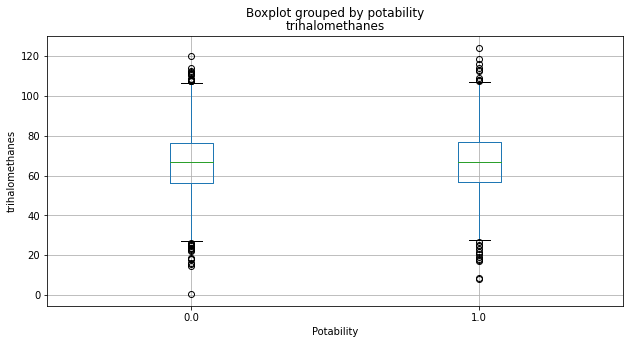

<Figure size 576x288 with 0 Axes>

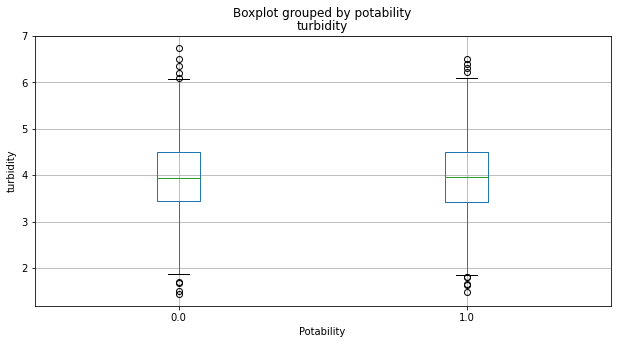

In [25]:
'''
Construct box plots to understand each feature distribution based on potability.
'''
for col in df.columns[0:9]:
    plt.figure(figsize=(8,4))
    df.boxplot(column=col, by='potability',figsize=(10,5))
    plt.xlabel("Potability".format(col), fontsize=10)
    plt.ylabel("{}".format(col), fontsize=10)
    plt.show()

In [26]:
df.corr()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


### Highlights for Bivariate Analysis: 
<ul>
    <li> 
    <li> 
    <li> 
<ul>

### Data Understanding - Cluster Analysis

In [34]:
df_reduced = df.drop('potability', axis = 1)

In [41]:
'''
Apply a standard scaler for cluster analysis.
Standardize the data using StandardScaler(). Store the standardized data as an array to input into the KMeans Model once ready.
'''
sc = StandardScaler()
X_cluster = sc.fit_transform(df_reduced)

In [45]:
'''
Generate a silhouette score for a specified number of clusters.
'''
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_cluster) for k in range(1,9)]

silhouette_scores = [silhouette_score(X_cluster, model.labels_) for model in kmeans_per_k[1:]]

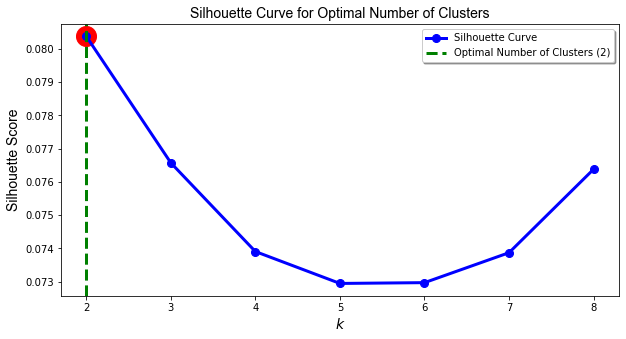

In [48]:
'''
Plot the Silhouette Score vs. Number of Clusters.
'''
plt.rcParams["figure.figsize"] = 10, 5
plt.plot(range(2, 9),  silhouette_scores, "bo-", linewidth = 3, 
        markersize = 8, label = 'Silhouette Curve')
plt.xlabel("$k$", fontsize = 14, family = 'Arial')
plt.ylabel("Silhouette Score", fontsize = 14, family = 'Arial')
plt.title('Silhouette Curve for Optimal Number of Clusters', family = 'Arial', fontsize = 14)

k = np.argmax(silhouette_scores) + 2

plt.axvline(x=k, linestyle='--', c = 'green', linewidth = 3, label = 'Optimal Number of Clusters ({})'.format(k))
plt.scatter(k, silhouette_scores[k-2], c= 'red', s=400)

plt.legend(shadow = True)
plt.show()

In [62]:
'''
Compute the within cluster sum of squares (wscc) for 20 different numbers of clusters. This will be helpful for plotting
the elbow method in the next cell.
'''
wscc = []

for i in range(1,9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X_cluster)
    wscc.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

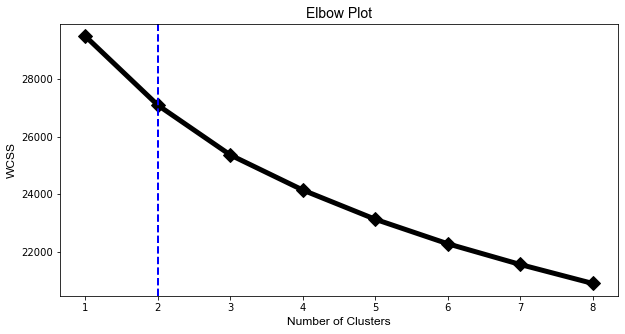

In [63]:
'''
Plot the elbow method for WSCC. This will help confirm the findings from the Silhouette Score Plot.
'''
plt.plot(range(1,9), wscc, linewidth = 5, color = 'black', marker = 'D', markersize = 10)
plt.title('Elbow Plot', family = 'Arial', fontsize = 14, color = 'black')
plt.xlabel('Number of Clusters', family = 'Arial', fontsize = 12, color = 'black')
plt.ylabel('WCSS', family = 'Arial', fontsize = 12, color = 'black')
number_of_clusters = 2

plt.axvline(x=number_of_clusters, linewidth = 2, color = 'blue', linestyle = '--')
plt.show

In [51]:
'''
Create the model with the optimal number of clusters.
'''
kmeans = KMeans(n_clusters=2)

In [52]:
'''
Fit the K-Means model to the data.
'''
kmeans.fit(X_cluster)

KMeans(n_clusters=2)

In [53]:
'''
Print the shape of the cluster labels to ensure it matches the shape of the dataset.
'''
kmeans.labels_.shape

(3276,)

In [54]:
'''
Print the clusters the model has assigned to each observation.
'''
print("The clusters are: ", kmeans.labels_)

The clusters are:  [1 0 1 ... 0 1 1]


In [56]:
'''
Print the WCSS.
'''
print("The WCSS is: ", round(kmeans.inertia_,2))

The WCSS is:  27091.43


In [57]:
'''
Predictions for the new data.
'''
predictions = kmeans.predict(X_cluster)

In [58]:
'''
Calculate the counts for the different clusters.
Create a dataframe and display the results.
'''
unique, counts = np.unique(predictions, return_counts= True)
counts = counts.reshape(1,2)
countsldf = pd.DataFrame(counts, columns = ['Cluster 0', 'Cluster 1'])
countsldf

,Cluster 0,Cluster 1
0,1445,1831


In [67]:
'''
Fit a PCA transformation with two features to the scaled data.
'''
pca = PCA(n_components = 2, random_state = 42)
X_new = pca.fit(X_cluster).transform(X_cluster)

<Figure size 720x360 with 0 Axes>

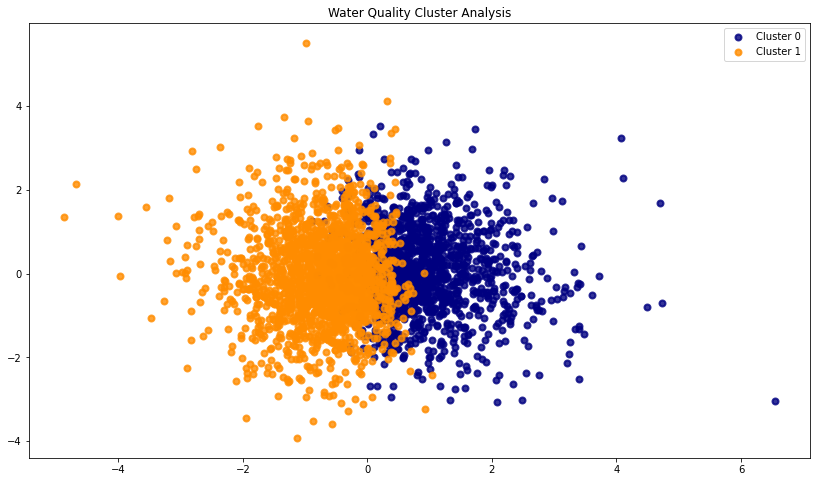

In [68]:
'''
Create a scatterplot of the PCA transformed data coloring each point by its cluster value.
'''
y_num = predictions
target_names = ['Cluster 0', 'Cluster 1']

plt.figure()
plt.figure(figsize = (14,8))
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(X_new[y_num == i, 0], X_new[y_num == i, 1], color = color, alpha = .8, lw = lw, label=target_name)

plt.legend(loc = 'best', shadow=False, scatterpoints = 1)
plt.title('Water Quality Cluster Analysis')
plt.show()

In [ ]:
### Highlights for Cluster Analysis: 
<ul>
    <li> 
    <li> 
    <li> 
<ul>

### Data Preparation

### Predictive Modeling

### Model Evaluation

### Assumptions
<ul>
    <li> 
<ul>

### Summary of Findings from Analysis and Model Deployment Recommendation